## [Sourcetracker2](https://github.com/biota/sourcetracker2) workflow

1. Download the [biom table](ftp://ftp.microbio.me/emp/release1/otu_tables/closed_ref_silva/emp_cr_silva_16S_123.qc_filtered.biom) and the [mapping file](ftp://ftp.microbio.me/emp/release1/mapping_files/emp_qiime_mapping_qc_filtered.tsv) from EMP release 1
1. Parse through the EMP mapping file to only select soil samples
1. Merge the EMP mapping file and experiment's mapping file, adding the SourceSink column and labeling all of the EMP data as Source and all experimental data as sink, while also renaming the column with source of data _(park, tundra, permafrost etc)_ to "Env".
1. Install sourcetracker2, following the [guideline](https://github.com/biota/sourcetracker2) provided.
1. Launch [batch_sourcetrack.pbs](../scripts/batch_sourcetrack.pbs)
  * __NB:__ this is a batch script, so it runs 4 script in one go. Look at the code for more info.
    * Merging OTU tables
    * 1617.08s
    * Filter table according to map
    * 111.72s
    * Filter OTUs present in less than 500
    * 97.69s
    * Filter samples less than 1300
    * 56.28s
1. Run [run_sourcetrack.pbs](../scripts/run_sourcetrack.pbs). __NB:__ uses st2 environment
  * Time: 2040.81s
1. This produces the 2 files used for downstream analysis presented here - [percentage table](./mixing_proportions.txt) and [standard deviation table](./mixing_proportions_stds.txt)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from palettable.colorbrewer.qualitative import Set3_12 as color_palette
import scipy

In [52]:
df = pd.read_csv('./mixing_proportions.txt', sep='\t', header=0, index_col=0)
df.fillna(0, inplace=True)
sns_df = (df*100).round(2)
sns_df.rename(columns={'extreme high temperature habitat':'extreme temperature'}, inplace=True)
sns_df

,Oil palm plantation,agricultural feature,agricultural soil,alluvial paddy field soil,animal-associated habitat,basin,bog,clay soil,coffee plantation,cultivated habitat,...,podzol,shrubland,steppe soil,surface soil,taiga,tropical soil,tundra,volcano,wetland,Unknown
515rcbc8,7.35,2.92,2.50,0.48,0.07,0.31,0.07,1.22,0.48,0.48,...,0.64,0.44,0.15,0.26,0.89,1.46,2.50,1.89,9.01,39.33
515rcbc9,0.28,1.42,13.58,0.07,0.12,0.95,0.02,1.12,2.87,0.84,...,0.09,0.62,0.72,0.34,0.16,0.02,2.52,2.54,4.55,41.52
515rcbc10,0.65,0.83,7.55,0.55,0.05,0.51,0.26,3.95,2.84,0.88,...,0.36,0.84,0.33,0.42,0.26,0.15,1.38,2.02,5.70,44.43
515rcbc11,0.98,3.92,3.94,0.40,0.15,0.45,0.13,1.17,3.67,0.67,...,0.33,1.10,0.38,0.36,0.22,0.13,1.25,4.47,13.69,34.49
515rcbc12,0.30,1.82,5.86,0.28,0.02,1.05,0.06,1.08,3.75,0.46,...,0.20,0.62,0.52,0.58,0.29,0.08,1.26,0.72,3.12,50.62
515rcbc13,0.55,1.02,12.36,0.34,0.00,0.33,0.05,2.05,3.57,1.32,...,0.20,0.61,0.06,0.20,0.07,0.02,1.16,1.80,5.95,45.28
515rcbc14,0.37,1.32,9.19,0.13,0.02,0.92,0.11,1.51,4.04,2.18,...,0.14,0.82,0.28,0.35,0.17,0.03,0.61,1.38,3.61,47.10
515rcbc15,0.83,0.58,9.38,0.52,0.18,0.48,0.25,1.68,3.50,1.92,...,0.12,1.12,0.23,0.28,0.09,0.02,0.85,5.93,3.57,48.61
515rcbc16,0.95,1.57,7.49,0.27,0.13,0.65,0.27,0.91,2.21,1.35,...,0.68,0.74,0.16,0.41,0.39,0.35,3.20,4.33,8.80,38.66
515rcbc17,0.79,0.72,11.62,0.13,0.15,0.48,0.23,1.35,3.10,2.84,...,0.04,1.42,0.12,0.17,0.07,0.07,1.35,3.07,6.07,45.46


In [53]:
df_std = pd.read_csv('./mixing_proportions_stds.txt', sep='\t', header=0, index_col=0)
df_std.fillna(0, inplace=True)


In [103]:
def plot_heatmap(dataframe, title=False, savename=False,):
    matplotlib.rcParams.update({'font.size': 30})
    fig, ax = plt.subplots(figsize=(30,40), dpi=50)
    sns.heatmap(ax=ax, data=dataframe.drop('Unknown', axis=1).T, cbar_kws=dict(use_gridspec=False,location="top", shrink=1))
    if savename:
        plt.savefig(savename, bbox_inches='tight')
    plt.show()
    

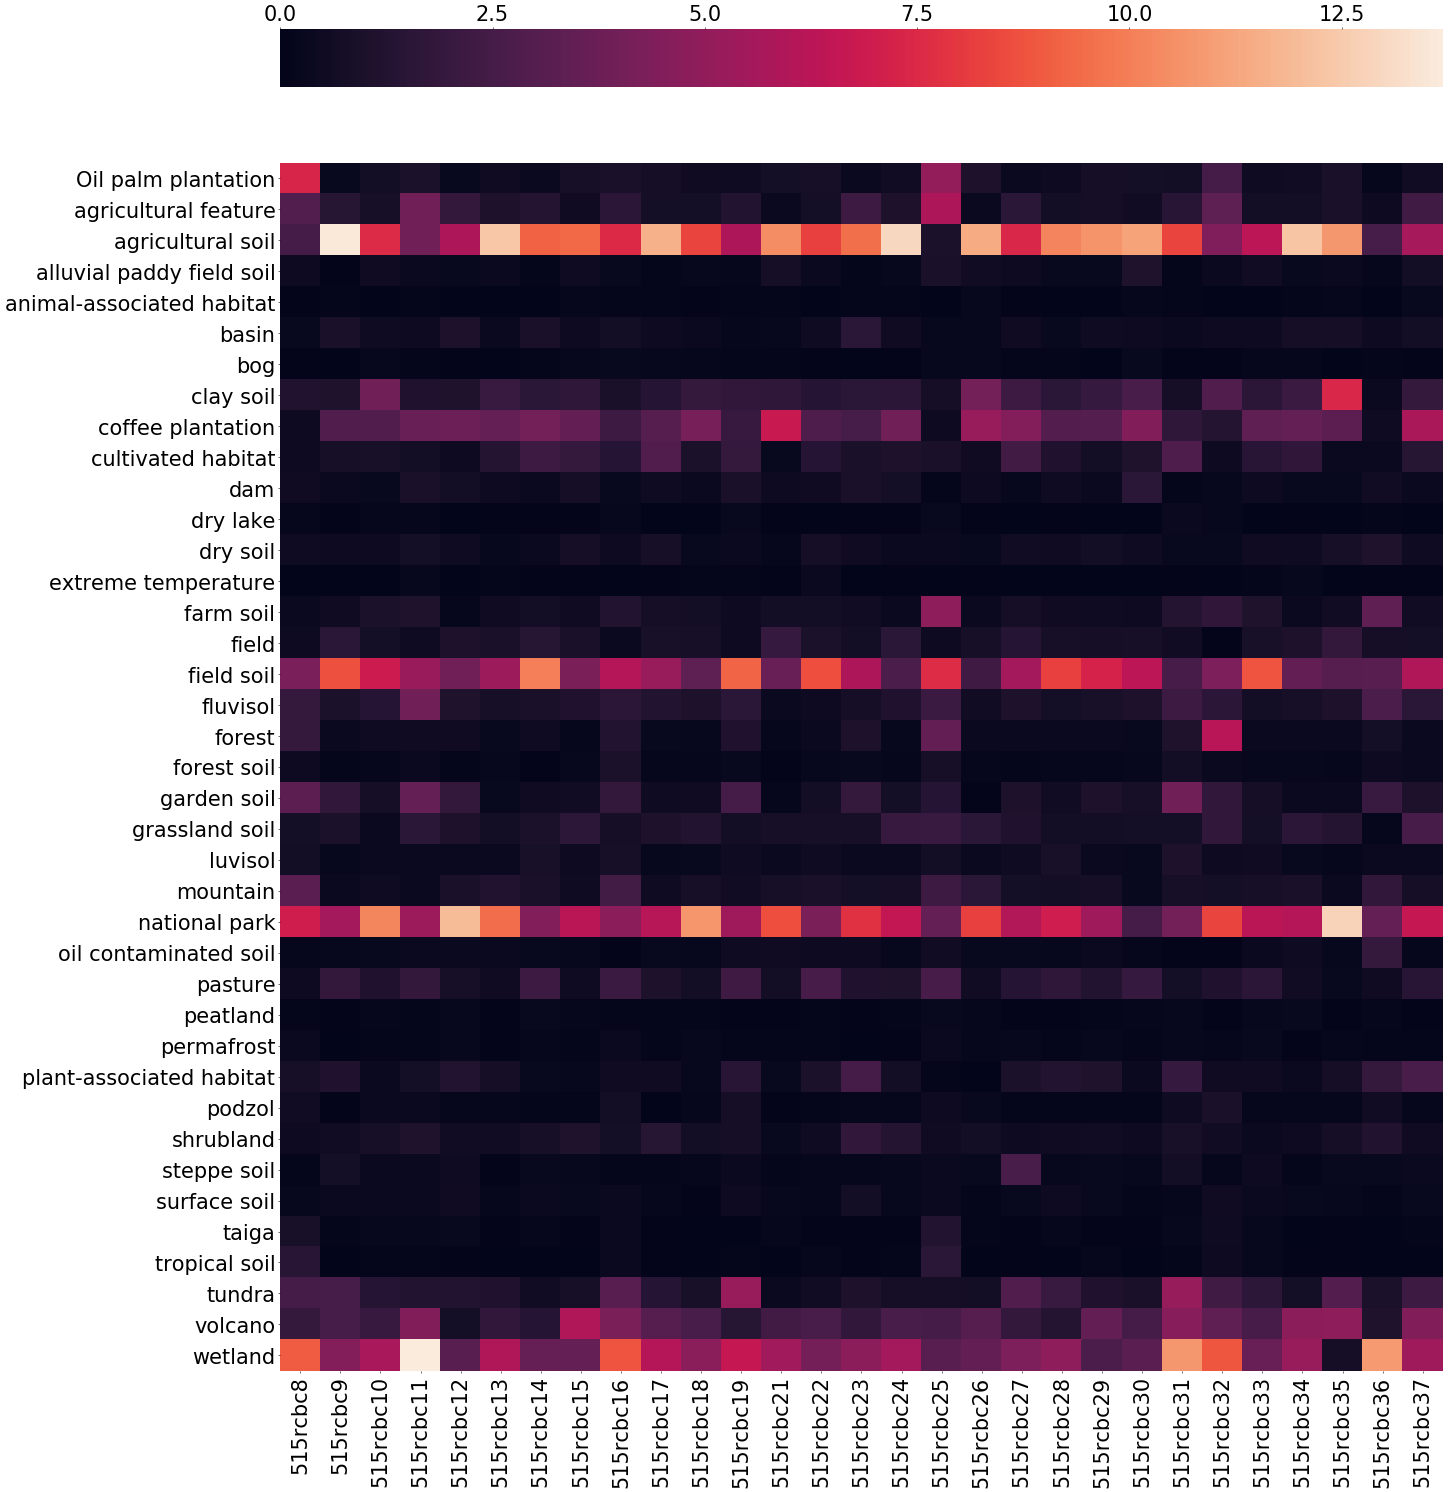

In [104]:
plot_heatmap(sns_df,
            savename='heatmap_perc.png')

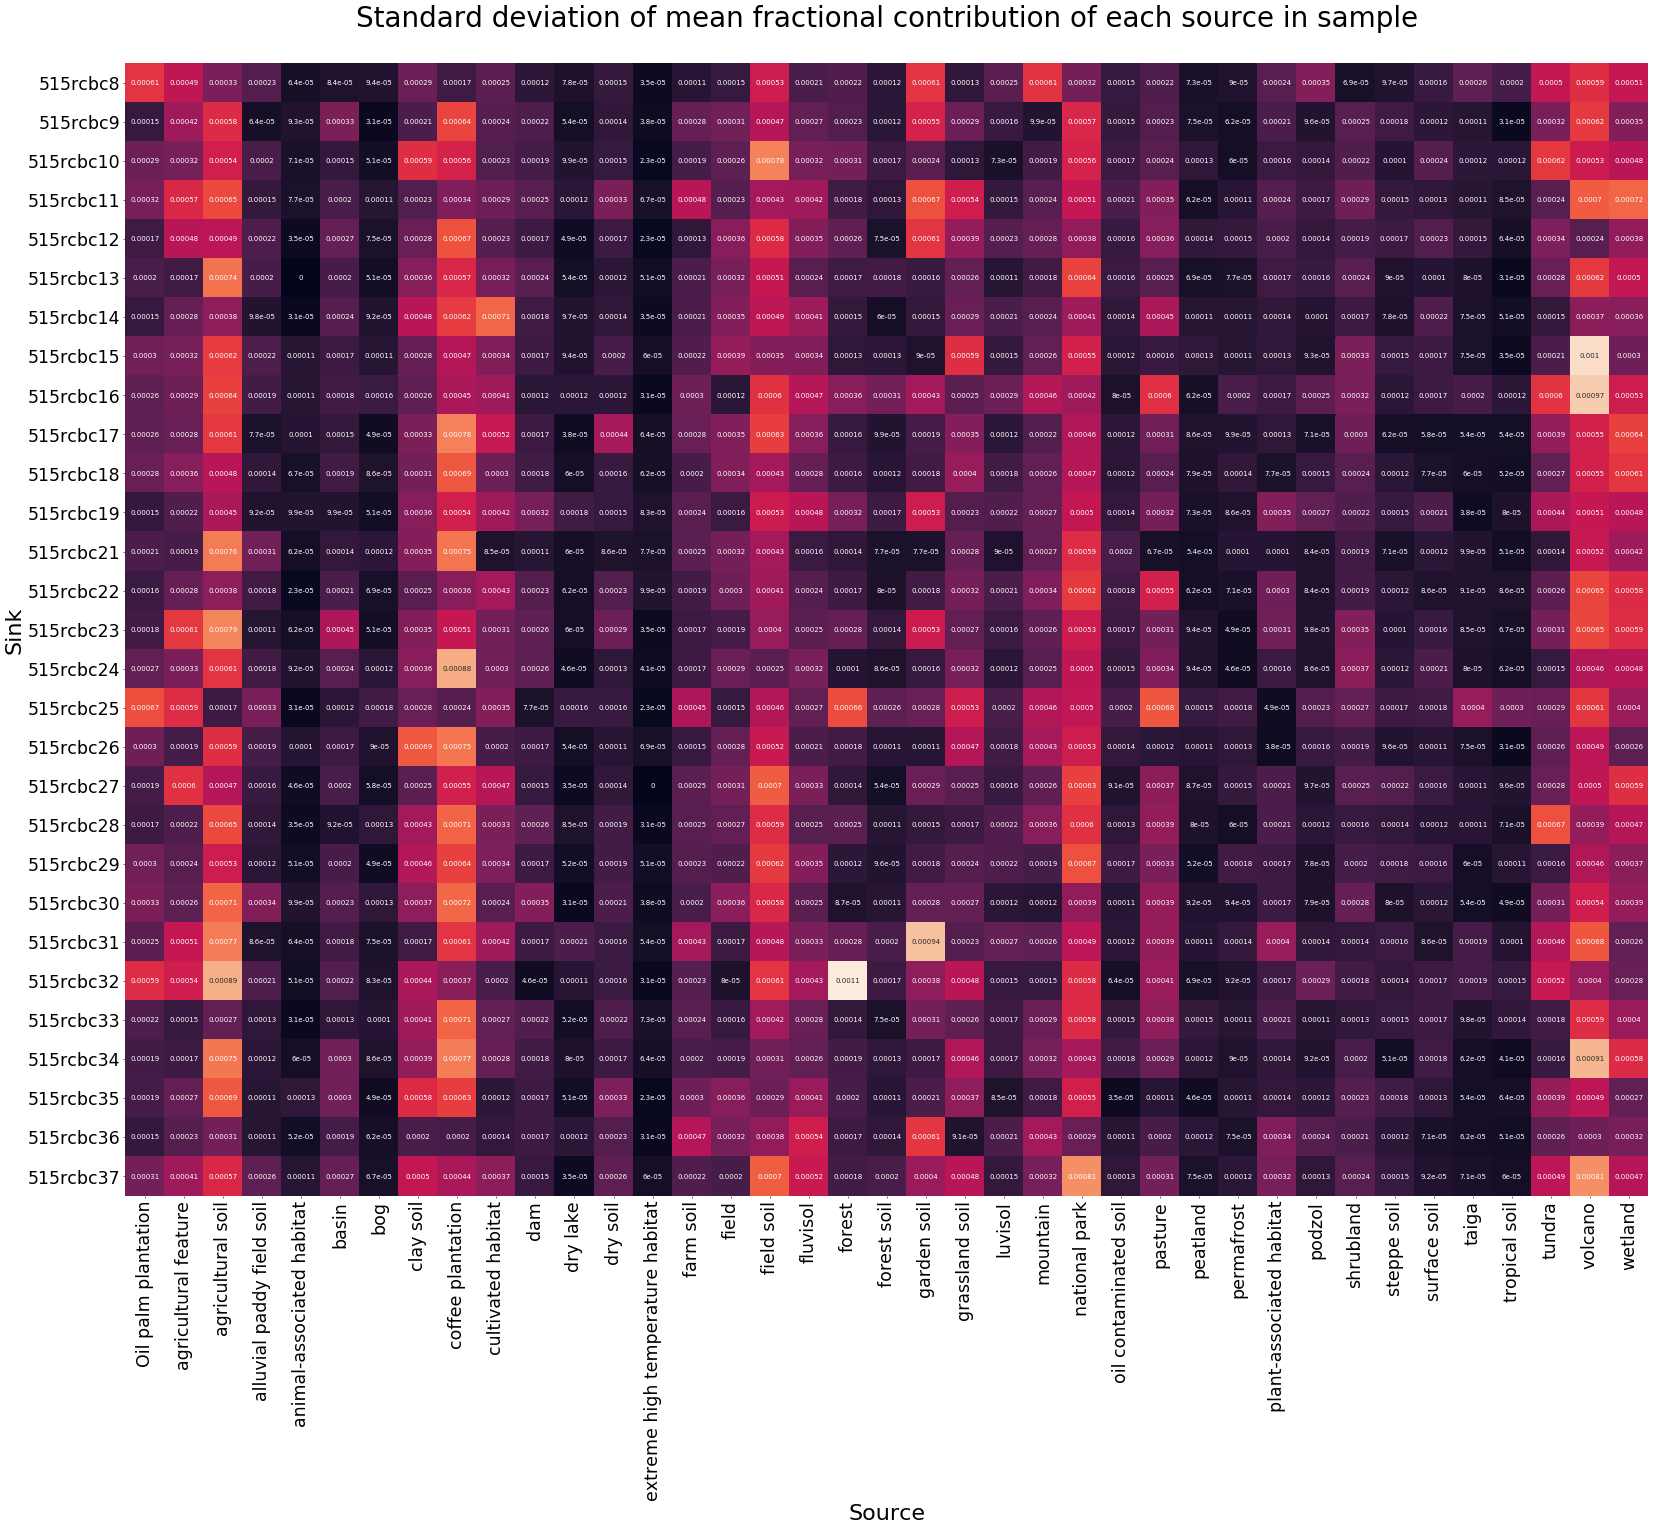

In [14]:
plot_heatmap(df_std, 
             title='Standard deviation of mean fractional contribution of each source in sample\n', 
             savename='heatmap_std.png')

In [7]:
def plot_pie_sample(sample, dataframe):
    colors = color_palette.hex_colors

#     crunch the numbers
    
    ser = dataframe.loc[sample]
    ser.sort_values(inplace=True, ascending=False)
    ser.drop(ser.index[11:], inplace=True)
    new = pd.Series(1-ser.sum(), index=['else'])
    ser = ser.append(new)
    
#     plot the graph
    
    matplotlib.rcParams.update({'font.size': 10})
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    sources = ser.index
    proportions = ser.values
    w,l,p = ax.pie(proportions, startangle=90, colors=colors, autopct='%1.1f%%',
          pctdistance=1.1, labeldistance=1.3);
    ax.legend(labels=sources, loc='lower left')
    [t.set_rotation(40) for t in p]
    plt.title("Sourcetracker results for sample " + sample)
    plt.savefig('./pie_charts/' + sample + '.png', bbox_inches='tight')
    plt.show()
    

In [8]:
!mkdir pie_charts

mkdir: cannot create directory ‘pie_charts’: File exists


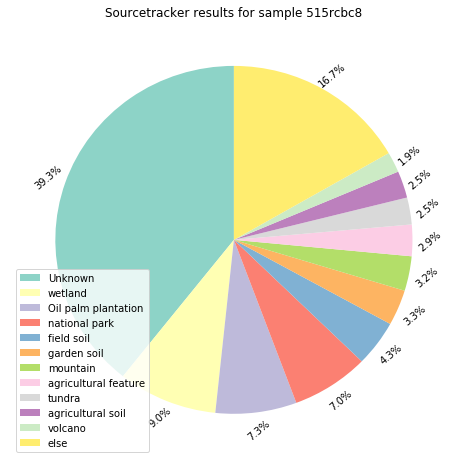

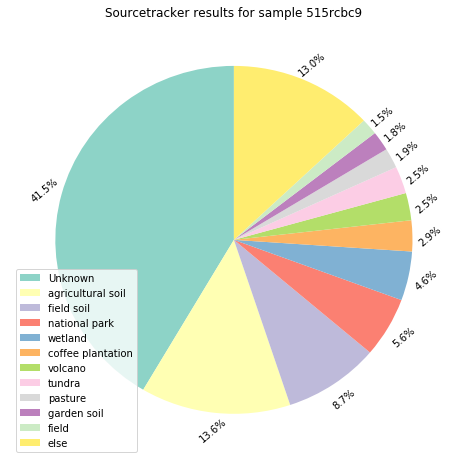

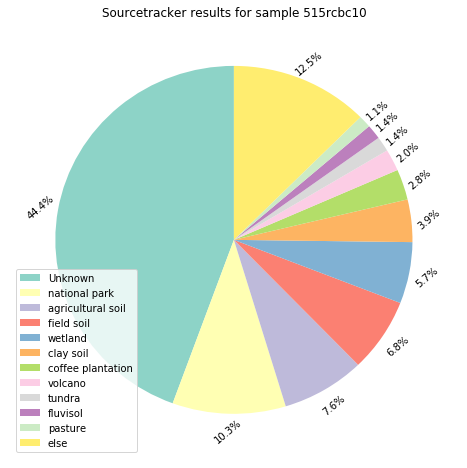

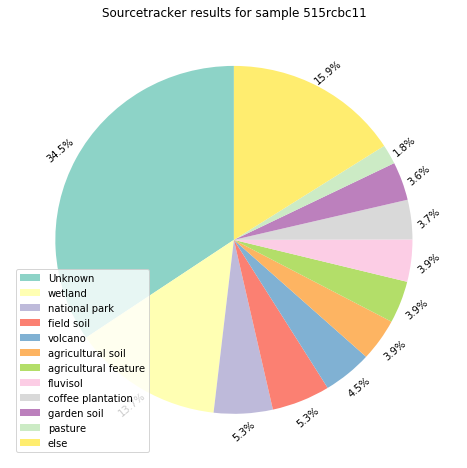

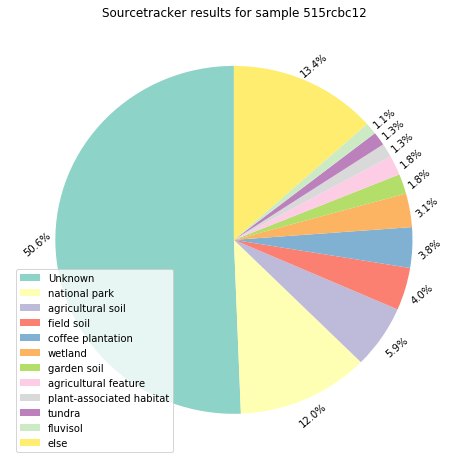

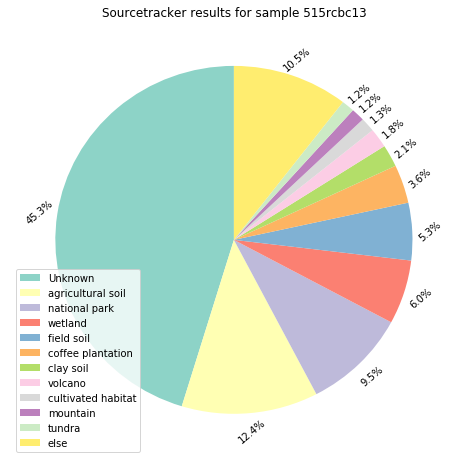

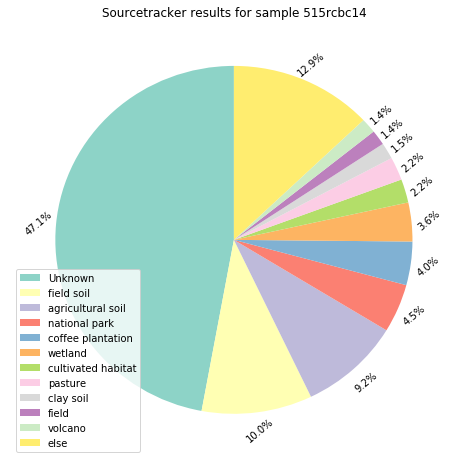

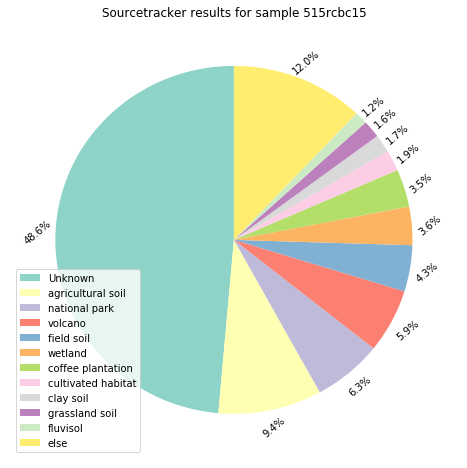

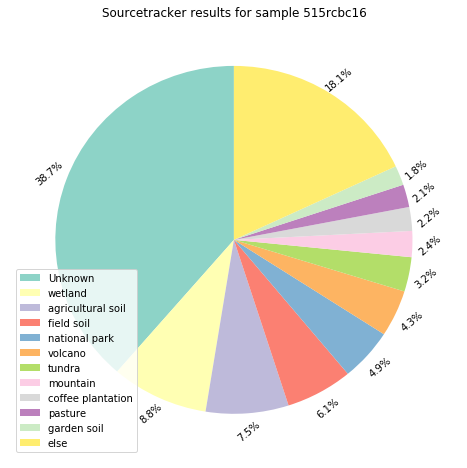

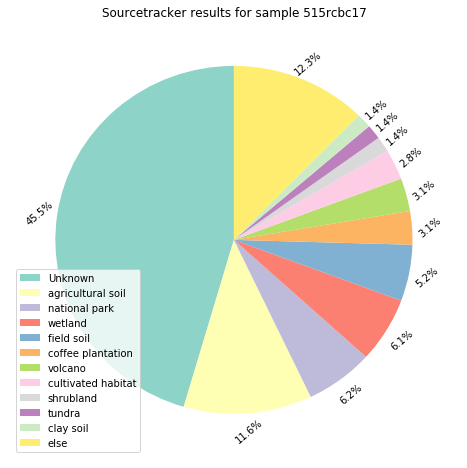

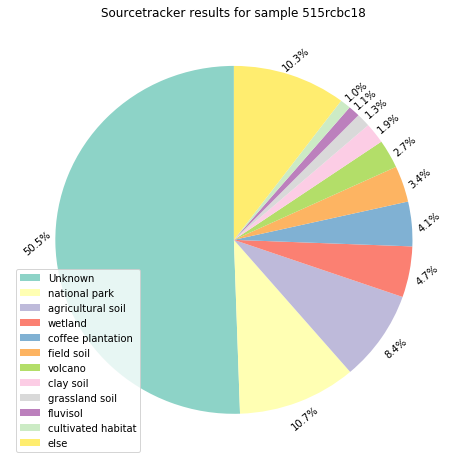

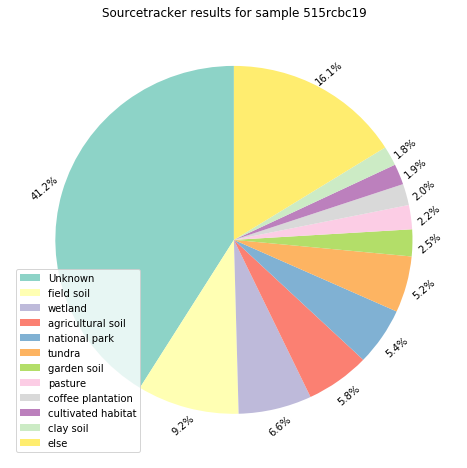

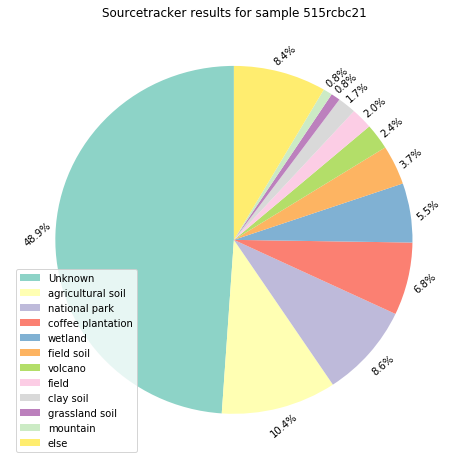

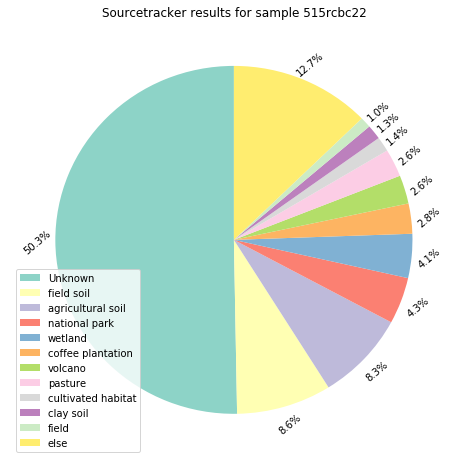

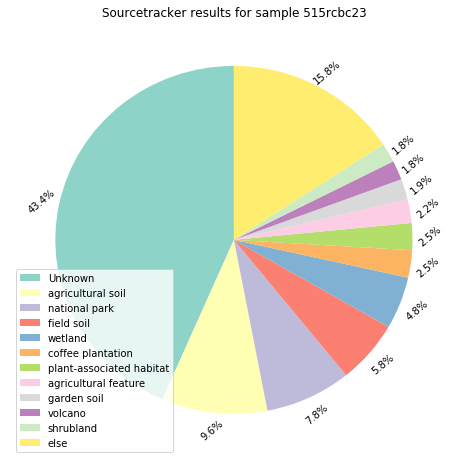

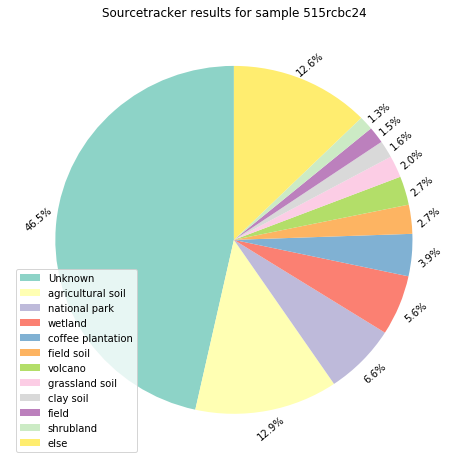

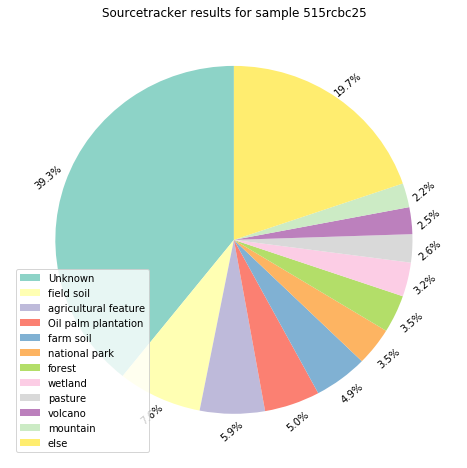

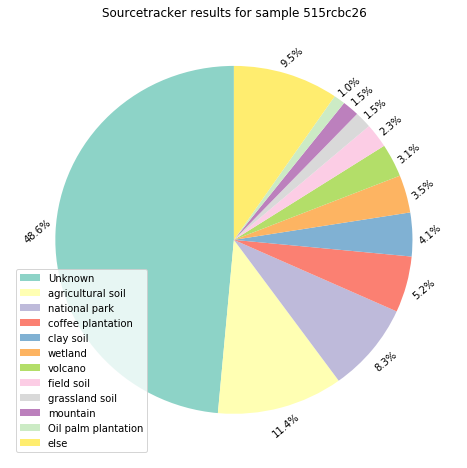

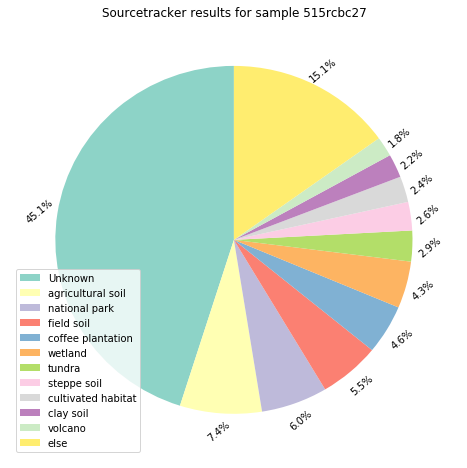

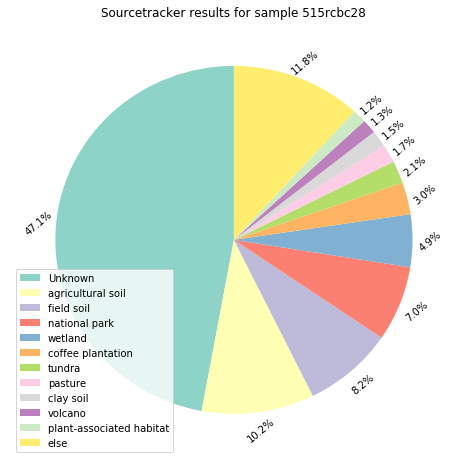

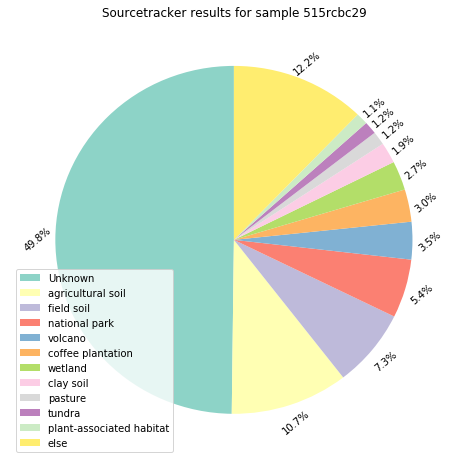

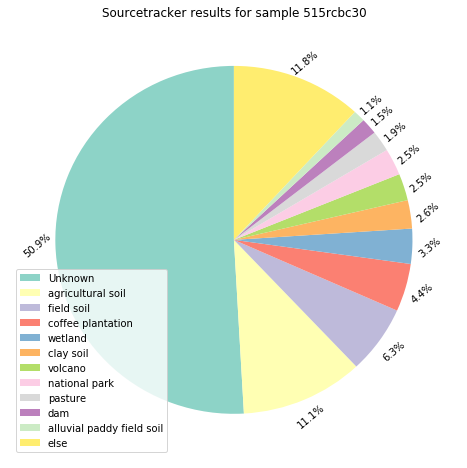

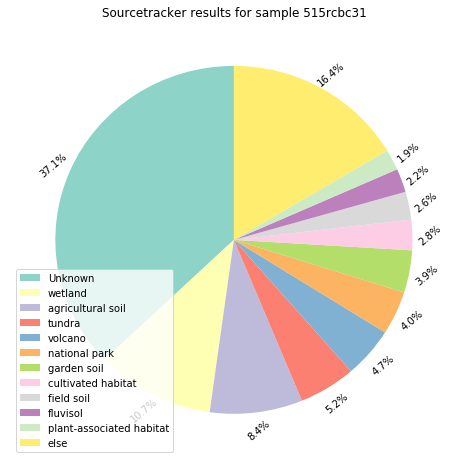

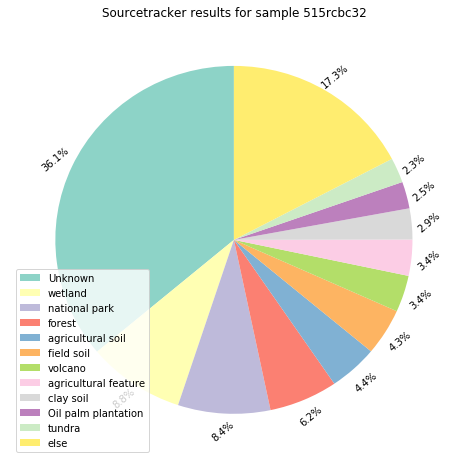

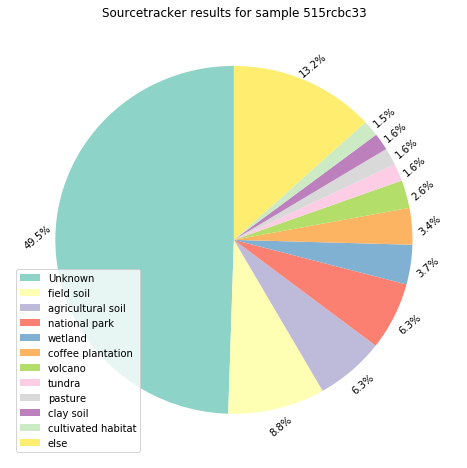

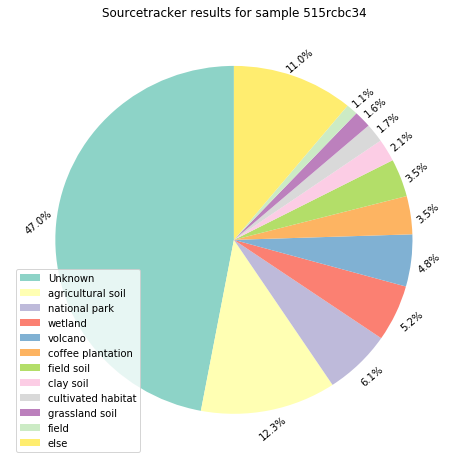

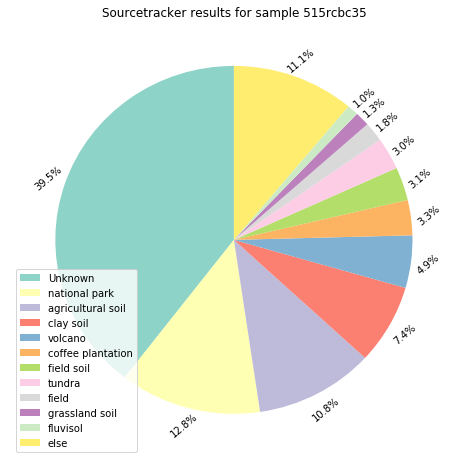

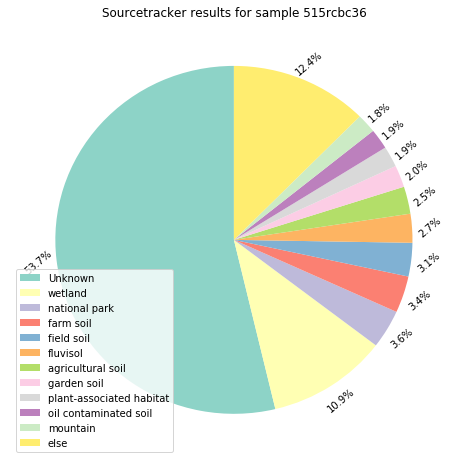

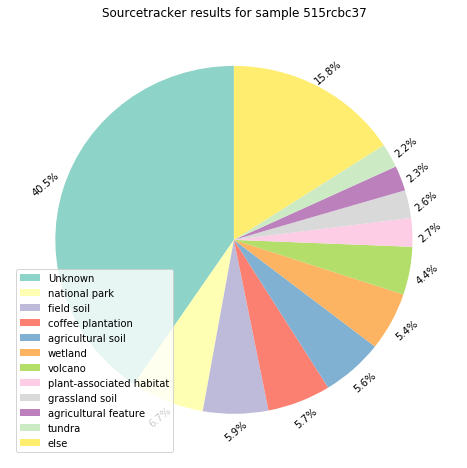

In [9]:
for samp in df.index:
    plot_pie_sample(samp, df)

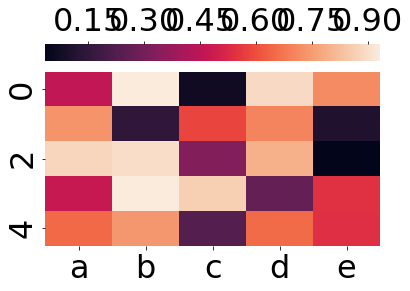

In [78]:
df = pd.DataFrame(np.random.random((5,5)), columns=["a","b","c","d","e"])

ax = sns.heatmap(df, cbar_kws = dict(use_gridspec=False,location="top"))

plt.show()

In [81]:
dict(use_gridspec=False,location="top")

{'use_gridspec': False, 'location': 'top'}